In [1]:
#All paths
main_path="D:/Visual/Project/Image_Classification/Hand"
data_path="D:/Visual/Project/Image_Classification/Data/Hand_1"
function_path="D:/Visual/Project/Image_Classification/Functions"

In [2]:
# import splitfolders
# splitfolders.ratio("D:\Visual\Project\Image_Classification\Data\Hand", output="D:\Visual\Project\Image_Classification\Data\Hand_1",seed=42, ratio=(0.7, 0.15, 0.15)) # default values

In [3]:
import os
import sys
import json

sys.path.insert(0,function_path)

# importing module1 from another folder
from Json import *

# d=Call_Dictionary(path)
# Create_Json(name,path,d)

d=Access_Json(data_path+"/Hand.json")

In [4]:
class_name=list(d['Test'])[:-1]
print(class_name)

['paper', 'rock', 'scissors']


Image shape: (200, 300, 3)


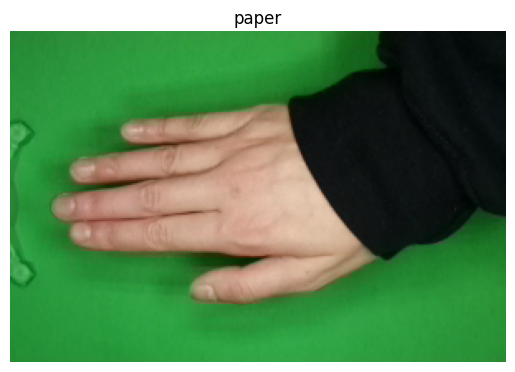

In [5]:
from Image import *
img = view_random_image(target_dir=data_path+"/train/",target_class="paper")

In [6]:
#Path
train_path=data_path+"/train"
test_path=data_path+"/test"
val_path=data_path+"/val"

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_path,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

val_data = train_datagen.flow_from_directory(val_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = train_datagen.flow_from_directory(test_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 1531 images belonging to 3 classes.
Found 326 images belonging to 3 classes.
Found 331 images belonging to 3 classes.


In [8]:
len(train_data),len(val_data),len(test_data)

(48, 11, 11)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

tf.random.set_seed(42)
# Create our model (a clone of model_8, except to be multi-class)
model_baseline= Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_baseline.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_baseline = model_baseline.fit(train_data, # now 10 different classes 
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=val_data,
                            validation_steps=len(val_data))

Epoch 1/5
48/48 [==============================] - 65s 1s/step - loss: 0.8015 - accuracy: 0.6506 - val_loss: 0.5538 - val_accuracy: 0.8221
Epoch 2/5
48/48 [==============================] - 69s 1s/step - loss: 0.4720 - accuracy: 0.8452 - val_loss: 0.5176 - val_accuracy: 0.8129
Epoch 3/5
48/48 [==============================] - 73s 2s/step - loss: 0.3893 - accuracy: 0.8687 - val_loss: 0.4021 - val_accuracy: 0.8742
Epoch 4/5
48/48 [==============================] - 64s 1s/step - loss: 0.2707 - accuracy: 0.9177 - val_loss: 0.3865 - val_accuracy: 0.8466
Epoch 5/5
48/48 [==============================] - 65s 1s/step - loss: 0.1917 - accuracy: 0.9360 - val_loss: 0.2591 - val_accuracy: 0.9233


In [10]:
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

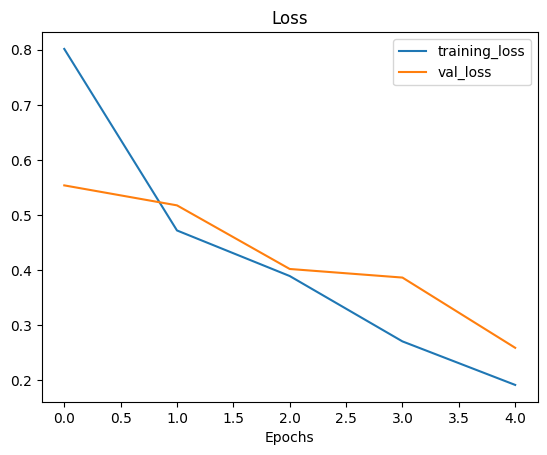

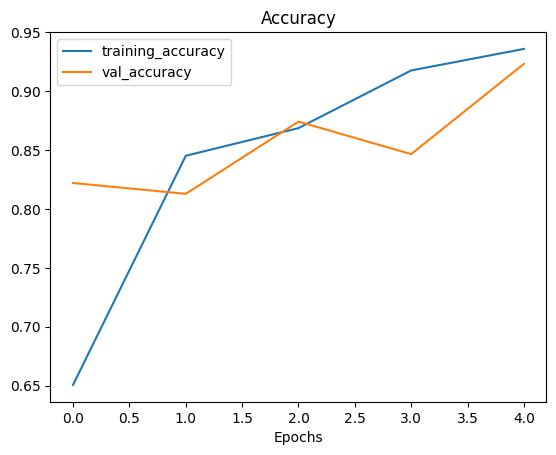

In [11]:
from Plot import plot_loss_curves
plot_loss_curves(history_baseline)

In [17]:
model_baseline.save(main_path+"/Models/baseline.h5")

In [13]:
#Evaluation the model
loss,acc=model_baseline.evaluate(test_data)
acc=acc*100
print(loss," ",acc,"%")

11/11 [==============================] - 4s 318ms/step - loss: 0.3262 - accuracy: 0.8792
0.3261565566062927   87.91540861129761 %


In [16]:
loaded_saved_model = tf.keras.models.load_model(main_path+"/Models/baseline1.h5")
loaded_saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_33 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_35 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 